
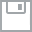
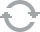
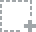
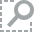
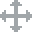
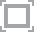
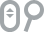
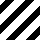
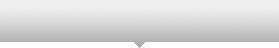
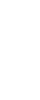
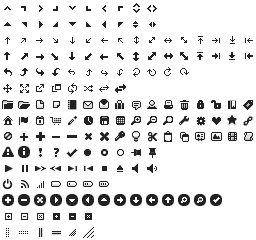
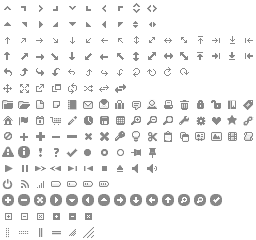
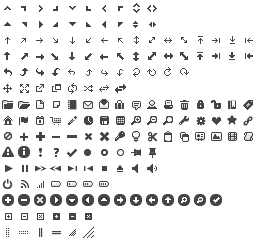
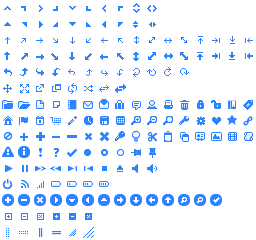
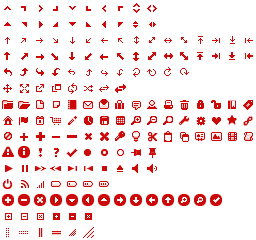
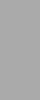
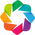
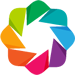

In [67]:
# imports libraries
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import math
import sklearn.decomposition as dcmp
import pyaudio
import csv
import IPython
import bokeh.plotting
bokeh.plotting.output_notebook()

%matplotlib inline 

# Grabs the preprocessing and automatic_sync files
sys.path.append(os.path.join(os.pardir,'pythonCode'))
import preprocessing as pp
import automatic_sync as autoS

In [68]:
# Estimated fracures are found first using the cropped audio sigals from I. Mantawy
fname = 'GP_B1_NL_18'

# Determines which cameras will be selected (['Bents'],['Camera Location'],['Motion #'])
filt = (None,None,['18']) # Selects the bent 1 camera used during motion 18

In [69]:
# now reads in the datafile from the raw data folder
rawDataPath = os.path.join(os.pardir,'rawData')
files = glob.glob(os.path.join(rawDataPath,'*.wav'))
names = []
        
for name in files:
    fileName = os.path.basename(name).split(".")[0]
    names.append(fileName)

# Applies filter to camera names and returns only selected subset names
audioFiles = pp.getKeys(names,filt);
# Reads the .wav files from the list generted by getKeys
(names,rawDataset) = pp.readWAV(rawDataPath,audioFiles);

Opening GP_B1_NL_18 ...
Opening GP_B1_NU_18 ...
Opening GP_B1_SL_18 ...
Opening GP_B1_SU_18 ...
Opening GP_B2_SL_18 ...
Opening GP_B2_SU_18 ...
Opening GP_B3_NL_18 ...
Opening GP_B3_NU_18 ...
Opening GP_B3_SL_18 ...
Opening GP_B3_SU_18 ...


In [70]:
# Grabs I. Mantawy's estimated fractures from the .csv file
csvPath = os.path.join(os.pardir,'rawData')
print(os.path.join(csvPath,fname + '.csv'))
fileName = glob.glob(os.path.join(csvPath,fname + '.csv')); 

fractures = list(csv.reader(open(fileName[0], 'rt'), delimiter=','))
fractures_ind = np.array([float(i[0]) for i in fractures],dtype = int) # in counts
   
print(fractures_ind) #prints the fractures in counts

..\rawData\GP_B1_NL_18.csv
[1639170 1642362 1668755 1683908 1686696 1695144 1697634 1704079 1706738
 1745828 1748963 1767183 1769661 1873515 1884022 1890688 1892481 1895382
 1910496 1912841 1915377 1920487 1923571 1925578]


In [71]:
final_offsets,syncData = autoS.sync_dataset(rawDataset,fname,names,max_iter = 2,mask=[0.7,1])

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [72]:
# Grabs snippets from each signal 
window_length = 8000
snips = {}

for name in names:
    chanii = rawDataset[name][:,0]
    snipii = []
    for frac_num in fractures_ind:
        rangeii = range(frac_num-window_length,frac_num+window_length)
        snipii.append(chanii[rangeii])
        
    snips[name] = snipii


In [77]:
snips[name][1]

array([-2051, -1982, -1974, ...,  2185,  1785,   307], dtype=int16)

In [124]:
import bokeh.models

TOOLS = [bokeh.models.BoxZoomTool(),bokeh.models.ResetTool(),
         bokeh.models.HoverTool(tooltips=[("index", "$index"),("x", "$x")])]

# pick a name
name = names[0]
print(name)

index = 23

startInd = fractures_ind[index] - window_length
chanii = snips[name][index]

p = bokeh.plotting.figure(plot_width=400, plot_height=400, tools=TOOLS)

x =  np.linspace(startInd,startInd + len(chanii),len(chanii))

p.circle(x,chanii, size=3.0)
bokeh.plotting.show(p)

GP_B1_NL_18


In [126]:
manual_frac = {}

In [142]:
# FOR GP_B1_NL_18
manual_frac['GP_B1_NL_18'] = np.array([1673028,1681114,1693159,1694160,170933,
                              1712137,1752674,1755683,1767949,
                              1775345,1775796,1776819,1779341,1898944,
                             1919123,1922479,1927985,1928940,192349,1929966,
                             193675,1931103,1931790,1932597])-8000

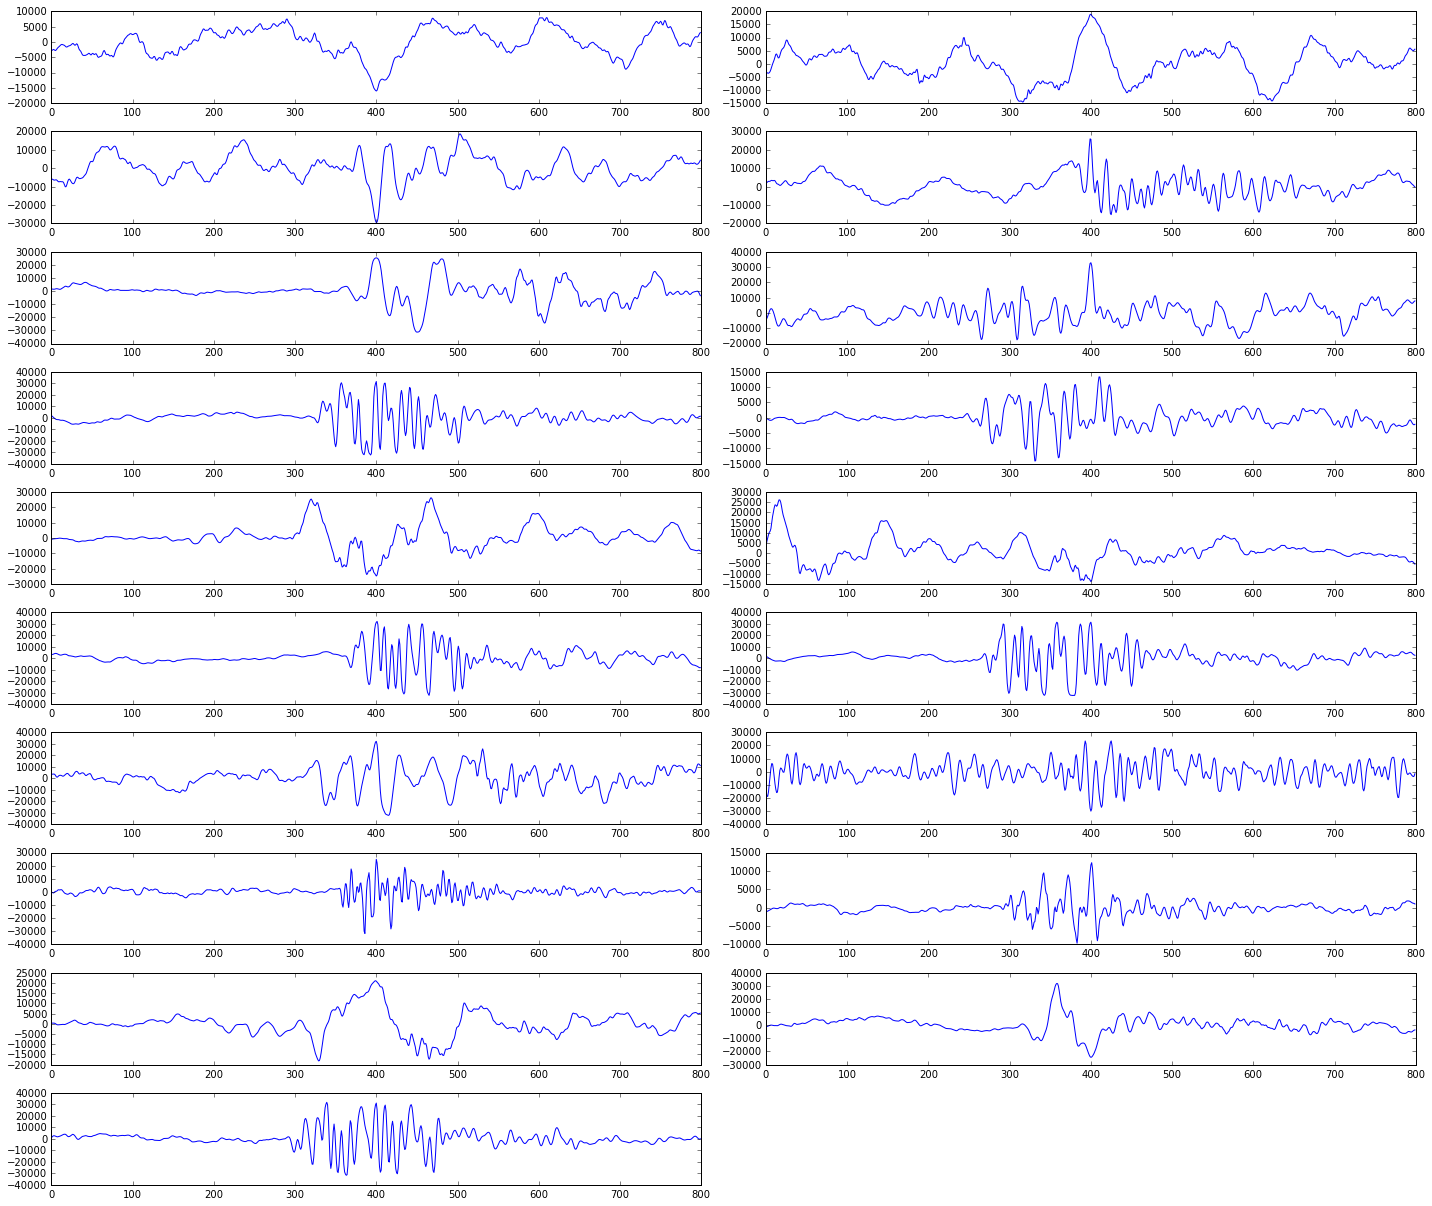

In [145]:
window_length = 300
name= 'GP_B1_NL_18'
num_windows = len(manual_frac[name])
chanii = rawDataset[name][:,0]

fig1 = plt.figure(figsize = (20,20))

index = 1

for fracInd in manual_frac[name]:
    rangeii = range(fracInd-window_length,fracInd+window_length)
    snip = chanii[rangeii]
    if max(abs(snip )) > 10000:
        plt.subplot(np.ceil(num_windows/2),2,index)
        plt.plot(snip)
        index +=1

fig1.tight_layout()